In [139]:
library(boot)
library(dplyr)
library(glmnet)
library(pls) 
library(ISLR)
library(MASS)
library(lmvar)
library(leaps)

Exercise 3 (p.198, Chap.5), 8 (p.200, Chap.5), 1 (p.259, Chap.6), 9 (p.263, Chap.6), 9 (p.299, Chap.7) and
10 (p.300, Chap.7)

#### Chap.5 Exercise 3

###### 
A) K fold approach involves randomly deviding the set of observation into k groups, or fold of approximately equal size, the first fold is treated as a validation set, and the method is fit on the remaining k-1 folds , the mean square error is then computed on the observation in the held-out fold. this procedure is repeated k times each time a diferent group of observation is treated as a validation set. this process result in k estimates of the test error k-fold CV estimate is computed by averaging these values.

###### 
B) Validation set approach: K-fold is better than validation set approach when the data size is small, but K-fold is slower and is more complex

LOOCV: K-fold it is faster and the variance of k-fold is smaller than LOOCV, if the data size is too small we can not use k-fold.

#### Chap.5 Exercise 8

In [52]:
# A)
set.seed(1)
x <- rnorm(100)
y <- x - 2*x^2 + rnorm(100)

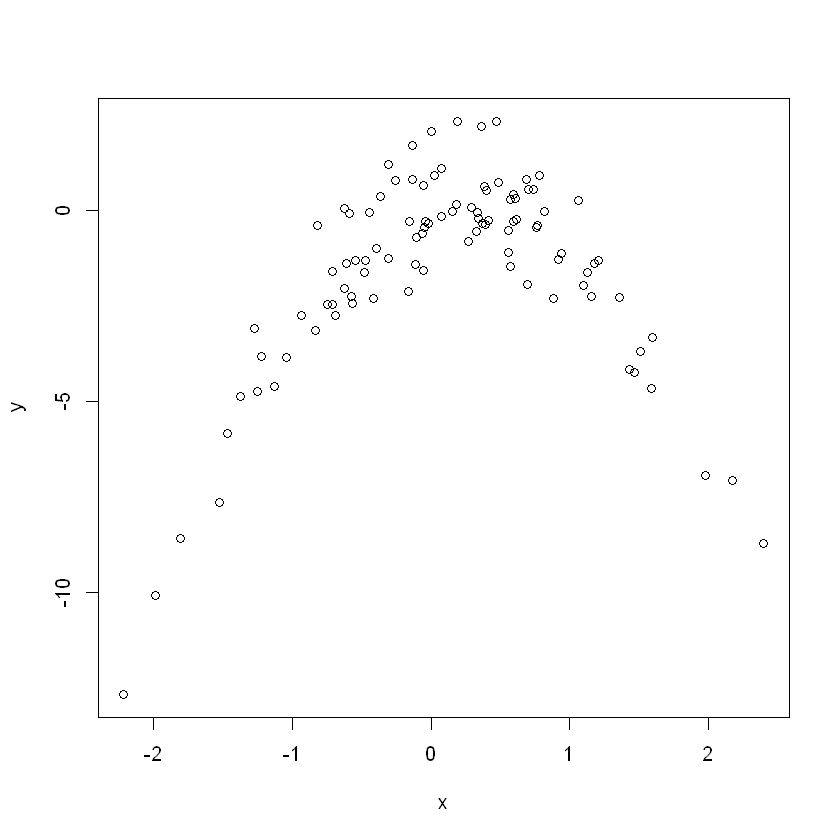

In [53]:
# B)
plot(x, y)

In [54]:
# c)
data<-data.frame(x,y)
loocv_error<-list()

set.seed(613)
for (i in 1:4) {
    model<- glm(y ∼ poly(x, i), data=data)
    result<- cv.glm(data, model)
    loocv_error[i]<-result$delta[1]
}

loocv_error

[[1]]
[1] 7.288162

[[2]]
[1] 0.9374236

[[3]]
[1] 0.9566218

[[4]]
[1] 0.9539049

In [55]:
# D)
data<-data.frame(x,y)
loocv_error<-list()

set.seed(123)
for (i in 1:4) {
    model<- glm(y ∼ poly(x, i), data=data)
    result<- cv.glm(data, model)
    loocv_error[i]<-result$delta[1]
}

loocv_error

[[1]]
[1] 7.288162

[[2]]
[1] 0.9374236

[[3]]
[1] 0.9566218

[[4]]
[1] 0.9539049

##### E) Second polynomial has lower error since the data shape is also polynomial with degree of 2.


In [56]:
# F)
data<-data.frame(x,y)
loocv_error<-list()

set.seed(613)
for (i in 1:4) {
    model<- glm(y ∼ poly(x, i), data=data)
    print(summary(model))
    result<- cv.glm(data, model)
    
    loocv_error[i]<-result$delta[1]
}

loocv_error


Call:
glm(formula = y ~ poly(x, i), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.5161  -0.6800   0.6812   1.5491   3.8183  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.550      0.260  -5.961 3.95e-08 ***
poly(x, i)     6.189      2.600   2.380   0.0192 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 6.760719)

    Null deviance: 700.85  on 99  degrees of freedom
Residual deviance: 662.55  on 98  degrees of freedom
AIC: 478.88

Number of Fisher Scoring iterations: 2


Call:
glm(formula = y ~ poly(x, i), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9650  -0.6254  -0.1288   0.5803   2.2700  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5500     0.0958  -16.18  < 2e-16 ***
poly(x, i)1   6.1888     0.9580    6.46 4.18e-09 ***
poly(x, i)2 -23.9483     0.9580 

[[1]]
[1] 7.288162

[[2]]
[1] 0.9374236

[[3]]
[1] 0.9566218

[[4]]
[1] 0.9539049

#### Chap.6 Exercise 1

#####
A) The model with K = p will have the smallest RSS

#####
B) Inconclusive based on the data, we may need to evaluate the model parametres.

#####
C)

i) TRUE
<br>
ii) TRUE
<br>
iii) FALSE
<br>
iv) FALSE
<br>
v) FALSE

#### Chap.6 Exercise 9

In [57]:
library(ISLR)

In [58]:
str(College)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [59]:
sum(is.na(College))

[1] 0

In [60]:
?College

College {ISLR},R Documentation


In [61]:
collage<-College
collage$Private <- as.numeric(collage$Private=='Yes')
str(collage)

'data.frame':	777 obs. of  18 variables:
 $ Private    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : num  60 56 54 59 15 55 63 73

In [62]:
set.seed(123)
#set row indexes
index <- sample(1:nrow(collage), round(0.5 * nrow(collage), 0))
#split data
train <- collage[index, ]
test <- collage[-index, ]

In [63]:
# B)

linear <- lm(Apps ~ ., data=train)
predict_lr <- predict(linear, newdata=test)

In [64]:
MSE <- mean((predict_lr - test$Apps)^2)
MSE

[1] 1373995

In [65]:
selected_columns=colnames(train%>%select(-Apps))
selected_columns

[1] "Private"     "Accept"      "Enroll"      "Top10perc"   "Top25perc"  
 [6] "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board"  "Books"      
[11] "Personal"    "PhD"         "Terminal"    "S.F.Ratio"   "perc.alumni"
[16] "Expend"      "Grad.Rate"

In [66]:
# C)

train.mat = model.matrix(Apps~., data=train)
test.mat = model.matrix(Apps~., data=test)
grid = 10 ^ seq(4, -2, length=100)
mod.ridge = cv.glmnet(train.mat, train[, "Apps"], alpha=0, lambda=grid, thresh=1e-12)
lambda.best = mod.ridge$lambda.min
lambda.best

[1] 18.73817

In [67]:
ridge.pred = predict(mod.ridge, newx=test.mat, s=lambda.best)

In [68]:
#Best Lambda
mean((test[, "Apps"] - ridge.pred)^2)

[1] 1431537

In [69]:
# D)
mod.lasso = cv.glmnet(train.mat, train[, "Apps"], alpha=1, lambda=grid, thresh=1e-12)
lambda.best = mod.lasso$lambda.min
lambda.best

[1] 21.54435

In [70]:
lasso.pred = predict(mod.lasso, newx=test.mat, s=lambda.best)
mean((test[, "Apps"] - lasso.pred)^2)

[1] 1397303

In [71]:
#coeficients
mod.lasso = glmnet(model.matrix(Apps~., data=College), College[, "Apps"], alpha=1)
predict(mod.lasso, s=lambda.best, type="coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -6.038452e+02
(Intercept)  .           
PrivateYes  -4.235413e+02
Accept       1.455236e+00
Enroll      -2.003696e-01
Top10perc    3.367640e+01
Top25perc   -2.403036e+00
F.Undergrad  .           
P.Undergrad  2.086035e-02
Outstate    -5.781855e-02
Room.Board   1.246462e-01
Books        .           
Personal     1.832910e-05
PhD         -5.601313e+00
Terminal    -3.313824e+00
S.F.Ratio    4.478684e+00
perc.alumni -9.796600e-01
Expend       6.967693e-02
Grad.Rate    5.159652e+00

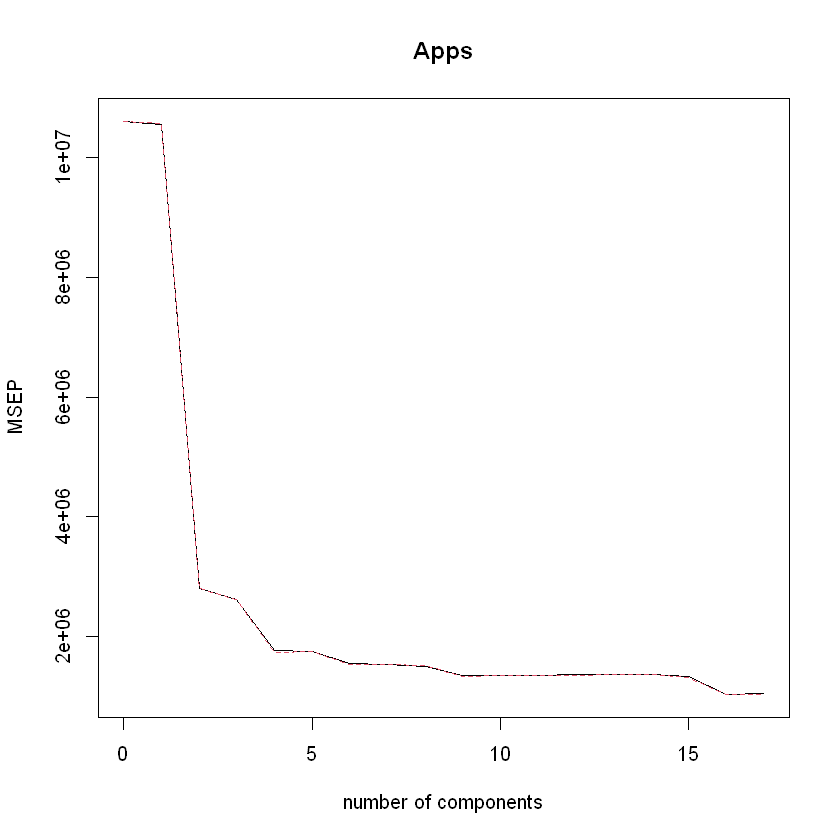

In [73]:
# E)
pcr.fit = pcr(Apps~., data=train, scale=T, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

In [78]:
pcr.pred = predict(pcr.fit, test, ncomp=10)
MSE <- mean((pcr.pred - test$Apps)^2)
MSE

[1] 2887472

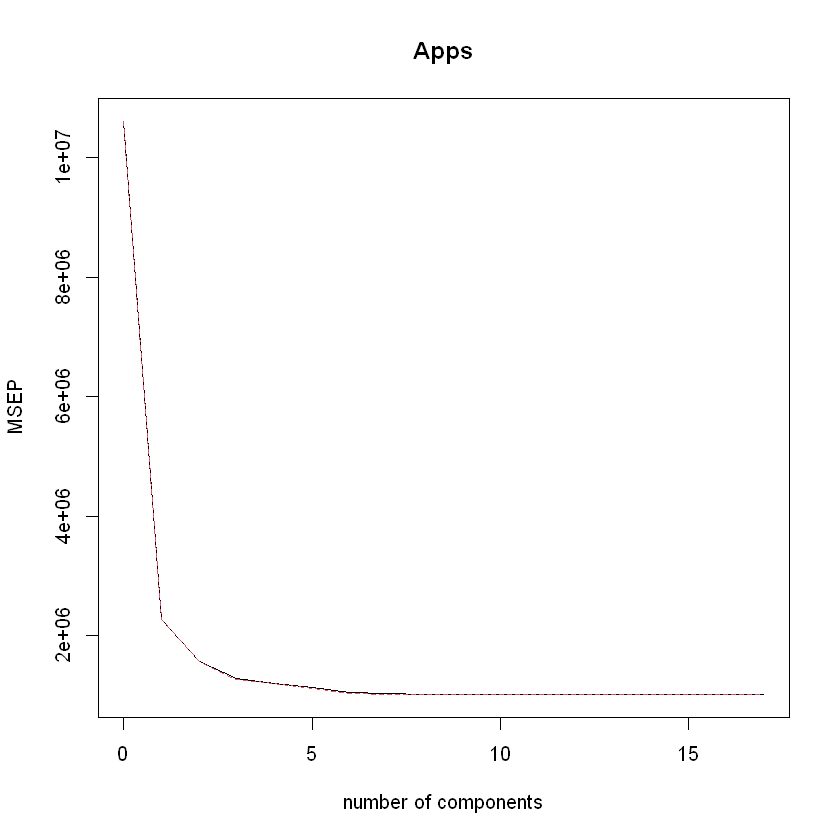

In [80]:
# F)
pls.fit = plsr(Apps~., data=train, scale=T, validation="CV")
validationplot(pls.fit, val.type="MSEP")

In [83]:
pls.pred = predict(pls.fit, test, ncomp=10)
mean((pls.pred - test$Apps)^2)

[1] 1384151

#####
G) OLS, Lasso, Ridge are comparable

#### Chap.7 Exercise 9

In [87]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [88]:
?Boston

Boston {MASS},R Documentation


In [89]:
# A)
lr_model_cube <- lm(nox ~ poly(dis, d=3), data=Boston)
summary(lr_model_cube)


Call:
lm(formula = nox ~ poly(dis, d = 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, d = 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, d = 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, d = 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


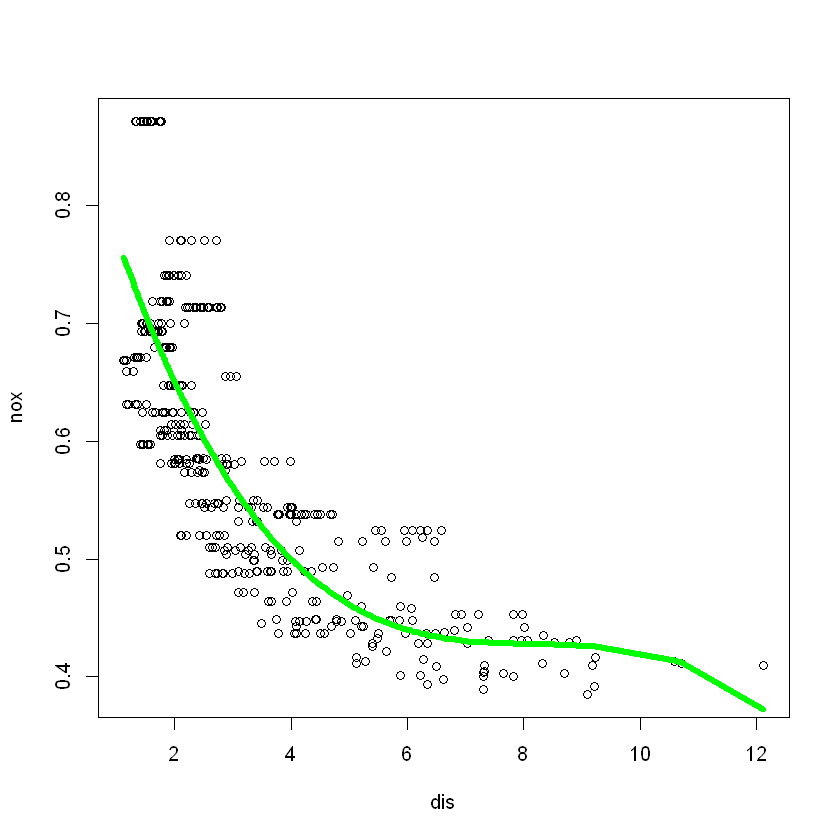

In [91]:
plot(Boston$nox ~ Boston$dis, xlab='dis', ylab='nox')
lines(sort(Boston$dis), fitted(lr_model_cube)[order(Boston$dis)], col='green', type='l',lw=5)

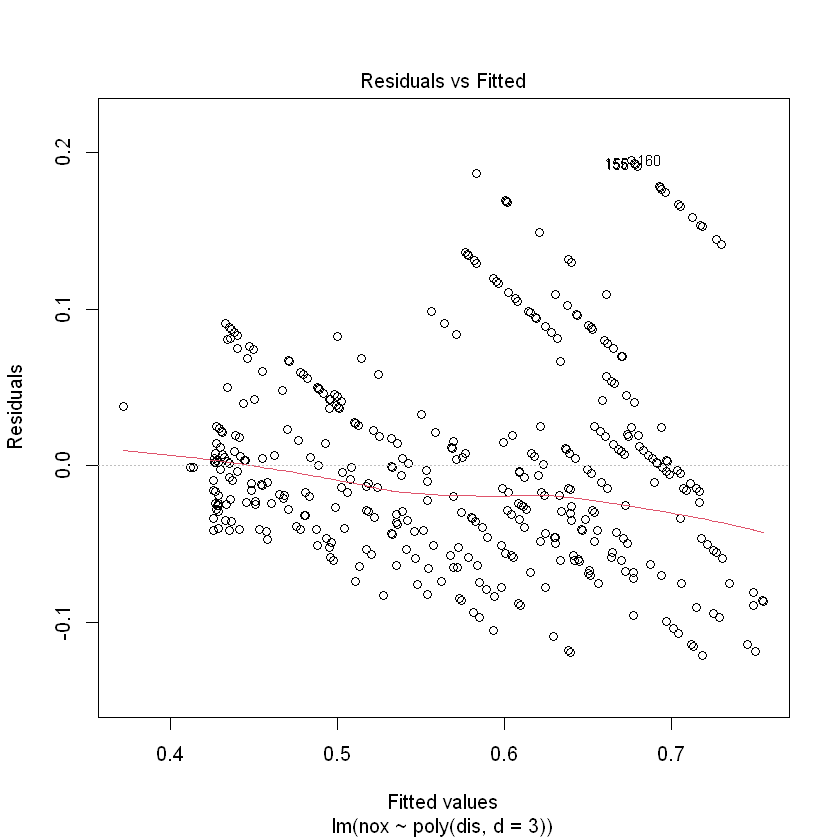

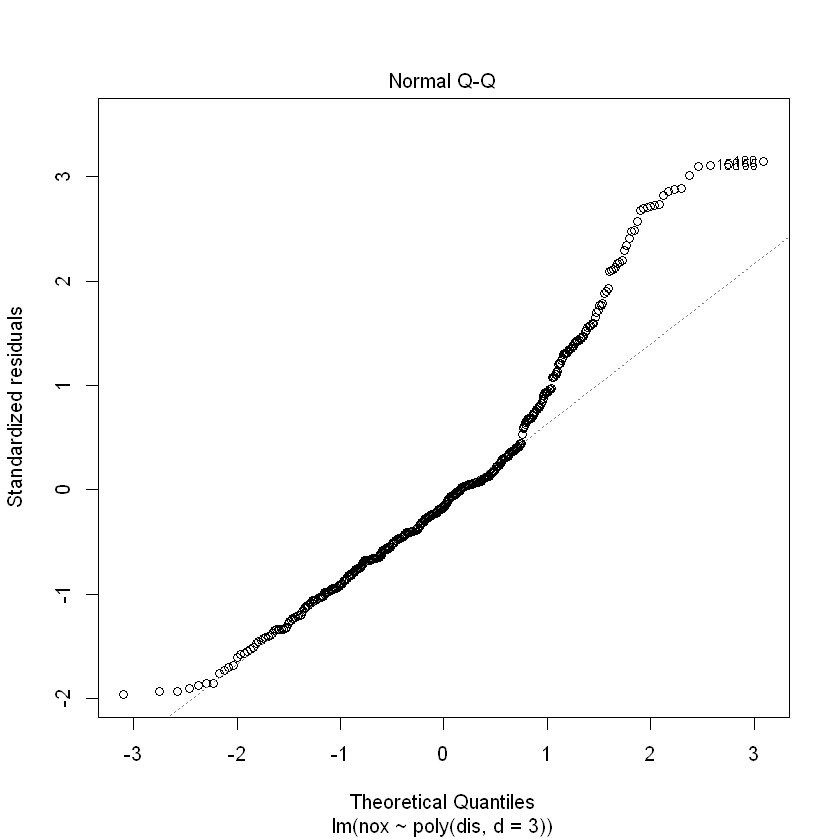

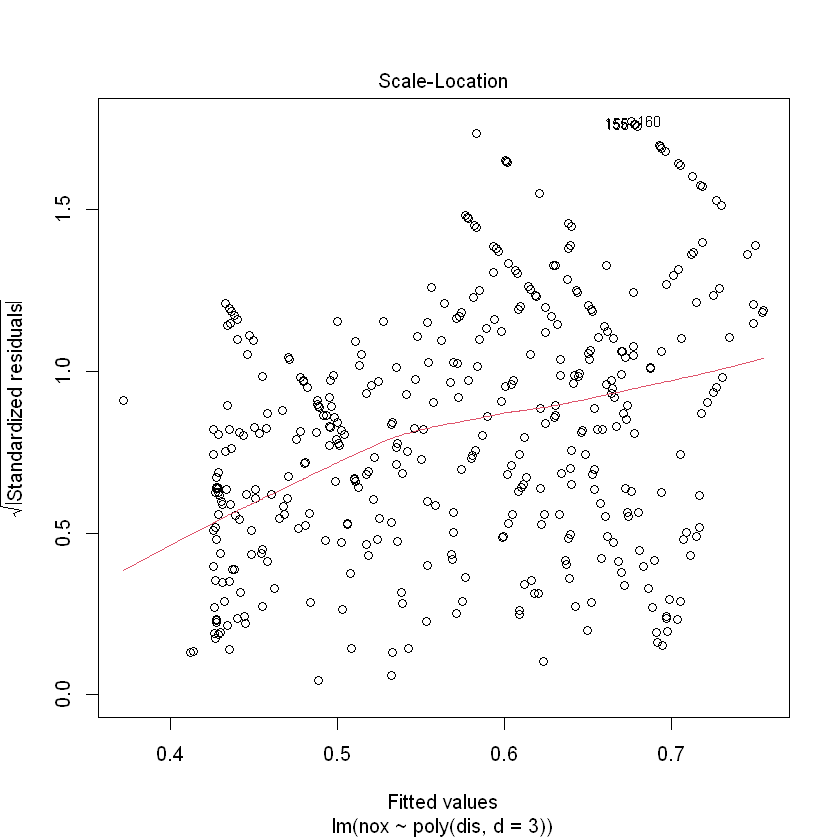

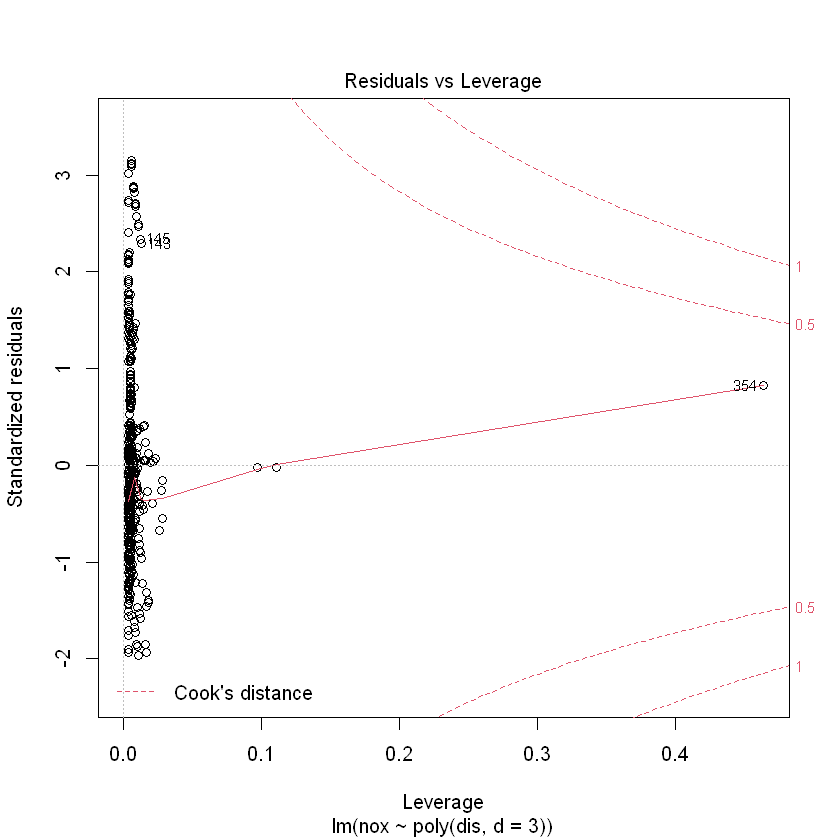

In [92]:
plot(lr_model_cube)

In [93]:
# B)

rss_results <- NULL
for (d in 1:10) {
    LR_for <- lm(nox ~ poly(dis, d=d), data=Boston)
    rss <- sum((predict(LR_for, newdata=Boston) - Boston$nox)^2)
    rss_results$degrees[d] <-  d
    rss_results$RSSs[d] <-  rss
}

In [94]:
rss_results <- data.frame(rss_results)
rss_results

degrees,RSSs
<int>,<dbl>
1,2.768563
2,2.035262
3,1.934107
4,1.932981
5,1.915290
6,1.878257
7,1.849484
8,1.835630
9,1.833331


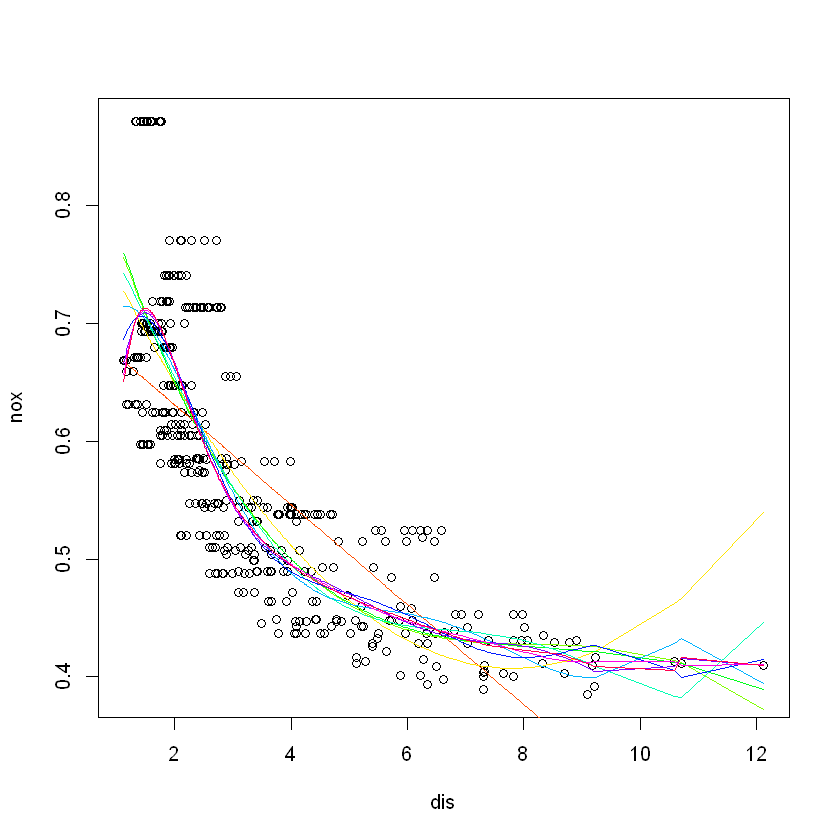

In [95]:
plot(Boston$nox ~ Boston$dis, xlab='dis', ylab='nox')
for (d in 1:10) {
    LR_for <- lm(nox ~ poly(dis, d=d), data=Boston)    
    lines(sort(Boston$dis), fitted(LR_for)[order(Boston$dis)],
          col=rainbow(20)[d+d], type='l') 
}

In [100]:
# C)
cross_validation <- NULL

for (d in 1:10) {
    LR_for <- lm(nox ~ poly(dis, d=d), data=Boston, x=TRUE, y=TRUE)
    CV_for <- cv.lm(LR_for, k=5, seed=123)
    cross_validation$Degrees[d] <- d
    cross_validation$MSE[d] <- CV_for$MSE$mean
    
}

In [101]:
cross_validation <- data.frame(cross_validation)
cross_validation

Degrees,MSE
<int>,<dbl>
1,0.005530913
2,0.004075204
3,0.003861502
4,0.003883657
5,0.004081549
6,0.004881712
7,0.007391917
8,0.004582410
9,0.024055149


In [102]:
cross_validation[cross_validation$MSE == min(cross_validation$MSE), ]

,Degrees,MSE
,<int>,<dbl>
3,3,0.003861502


In [103]:
# D)
library(splines)
LR_splines <- lm(nox ~ bs(dis, df=4), data=Boston)

In [104]:
summary(LR_splines)


Call:
lm(formula = nox ~ bs(dis, df = 4), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124622 -0.039259 -0.008514  0.020850  0.193891 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.73447    0.01460  50.306  < 2e-16 ***
bs(dis, df = 4)1 -0.05810    0.02186  -2.658  0.00812 ** 
bs(dis, df = 4)2 -0.46356    0.02366 -19.596  < 2e-16 ***
bs(dis, df = 4)3 -0.19979    0.04311  -4.634 4.58e-06 ***
bs(dis, df = 4)4 -0.38881    0.04551  -8.544  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06195 on 501 degrees of freedom
Multiple R-squared:  0.7164,	Adjusted R-squared:  0.7142 
F-statistic: 316.5 on 4 and 501 DF,  p-value: < 2.2e-16


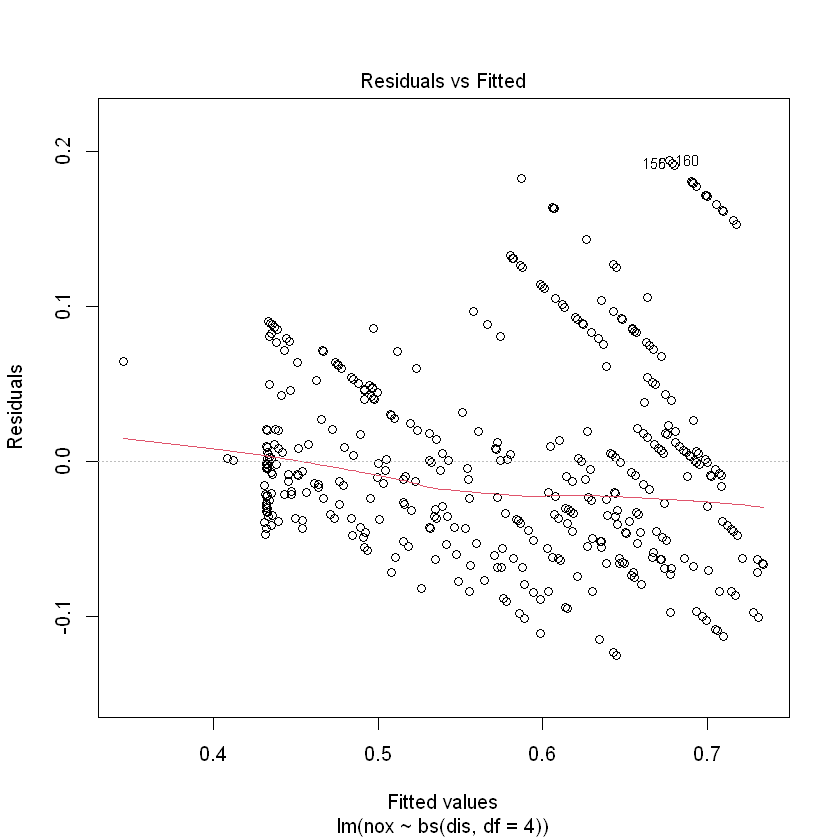

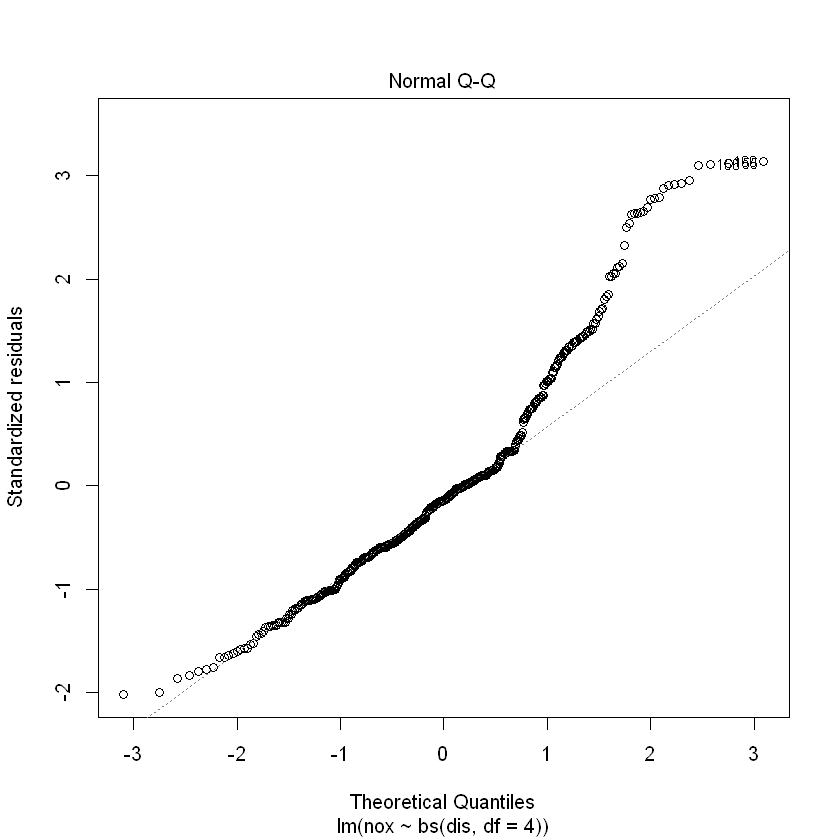

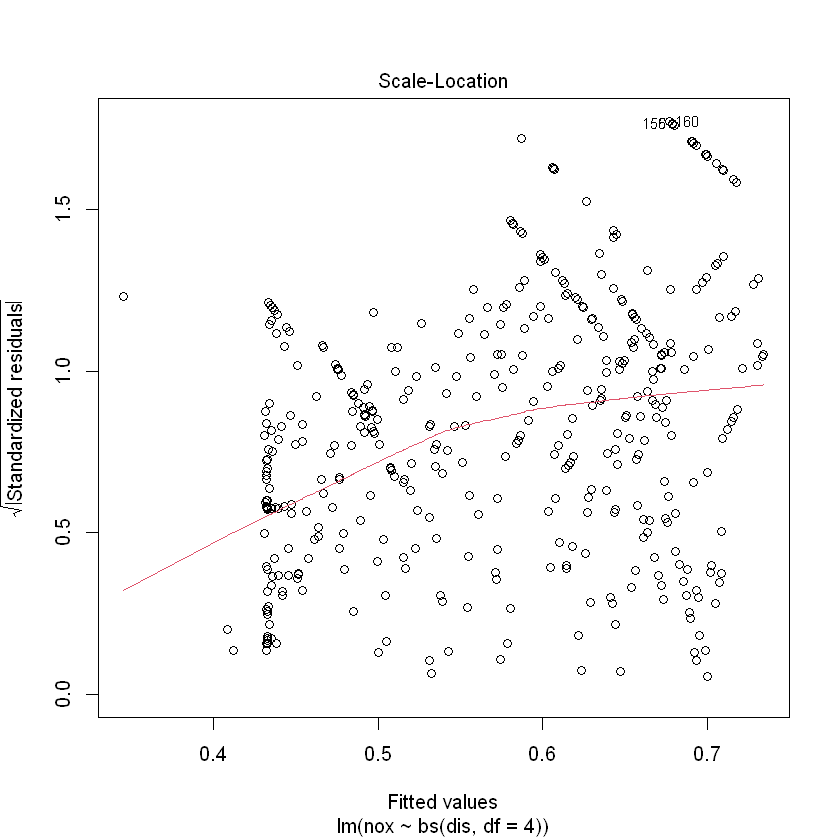

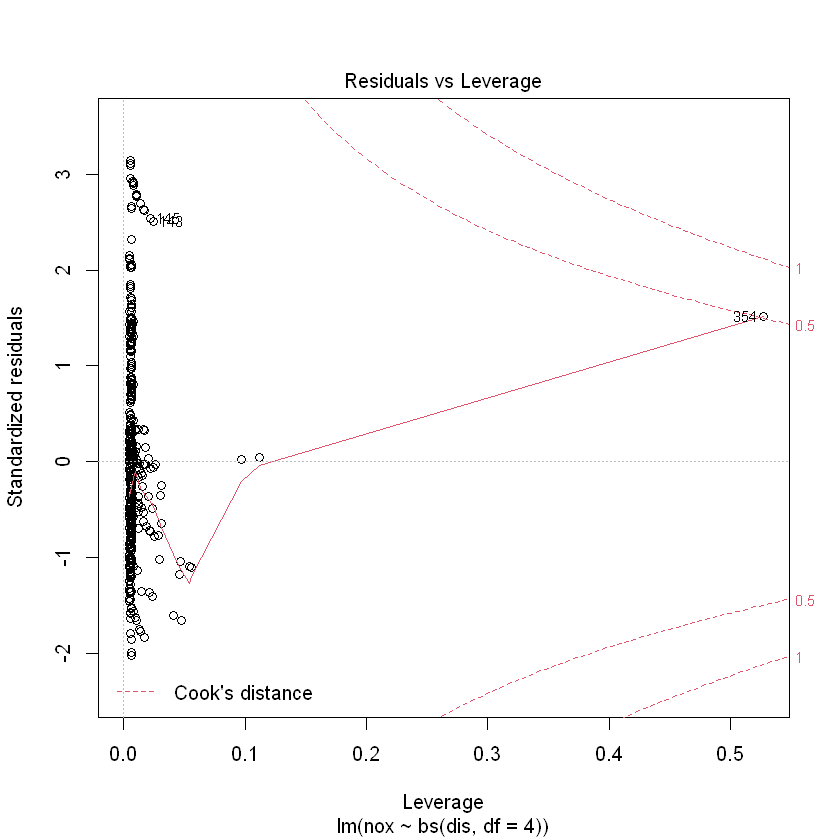

In [105]:
plot(LR_splines)

In [106]:
Spline_df <- NULL
for (d in 1:20) {
    spline_for <- lm(nox ~ bs(dis, df=d), data=Boston)
    RSS <- sum((predict(spline_for, newdata=Boston) - Boston$nox)^2)
    Spline_df$Dgrees[d]<-d
    Spline_df$RSS[d] <- RSS
    
}

Warning message in bs(dis, df = d):
"'df' was too small; have used 3"
Warning message in bs(dis, df = d):
"'df' was too small; have used 3"


In [107]:
Spline_df <- data.frame(Spline_df)
Spline_df

Dgrees,RSS
<int>,<dbl>
1,1.934107
2,1.934107
3,1.934107
4,1.922775
5,1.840173
6,1.833966
7,1.829884
8,1.816995
9,1.825653


In [108]:
# F)
cross_validation_splines <- NULL

for (d in 1:20) {
    spline_for <- lm(nox ~ bs(dis, df=d), data=Boston, x=TRUE, y=TRUE)
    CV_for <- cv.lm(spline_for, k=5, seed=123)
    cross_validation_splines$Degrees[d] <- d
    cross_validation_splines$MSE[d] <- CV_for$MSE$mean
    
}

Warning message in bs(dis, df = d):
"'df' was too small; have used 3"
Warning message in bs(dis, df = d):
"'df' was too small; have used 3"


In [109]:
cross_validation_splines <- data.frame(cross_validation_splines)
cross_validation_splines

Degrees,MSE
<int>,<dbl>
1,0.003861502
2,0.003861502
3,0.003861502
4,0.003867090
5,0.003698980
6,0.003703753
7,0.003703729
8,0.003697953
9,0.003735732


In [110]:
cross_validation_splines[cross_validation_splines$MSE == min(cross_validation_splines$MSE), ]

,Degrees,MSE
,<int>,<dbl>
10,10,0.003672526


#### Chap.7 Exercise 9

In [112]:
collage<-College
collage$Private <- as.numeric(collage$Private=='Yes')
set.seed(123)

#set index
index <- sample(1:nrow(collage), round(0.5 * nrow(collage), 0))

#split data
train <- collage[index, ]
test <- collage[-index, ]

In [116]:
length(train)
length(test)

[1] 18

[1] 18

In [135]:
selected_columns <- colnames(train)[colnames(train) != "Outstate"]
length(selected_columns)

[1] 17

In [153]:
#forward selection
set.seed(123)

folds <- sample(1:5, nrow(train), replace=TRUE)

In [154]:
cv_mat <- matrix(NA, k, nvar, dimnames=list(NULL, paste(1:nvar)))

In [ ]:
for (j in 1:5) {
    LR_for <- regsubsets(Outstate ∼ ., data=train[folds != j, ], nvmax=17, method='forward')
    for(i in 1:nvar) {
        prediction <- predict(LR_for, train[folds == j, ], id=i)
        cv_mat[j, i] <- mean((train$Outstate[folds == j] - prediction)^2)
    }
}
mean_error <- apply(cv_mat, 2, mean)
plot(mean_error, type='l')